### Importing Required Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Reading the Dataset

In [2]:
df = pd.read_csv("detect_dataset.csv")

In [3]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [4]:
df['Output (S)'].value_counts()

0    6505
1    5496
Name: Output (S), dtype: int64

### Removing the unnecessary columns

In [5]:
df.drop(['Unnamed: 7','Unnamed: 8'],axis = 1,inplace = True)

In [6]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


In [7]:
df['Output (S)'].unique()

array([0, 1], dtype=int64)

### Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 656.4 KB


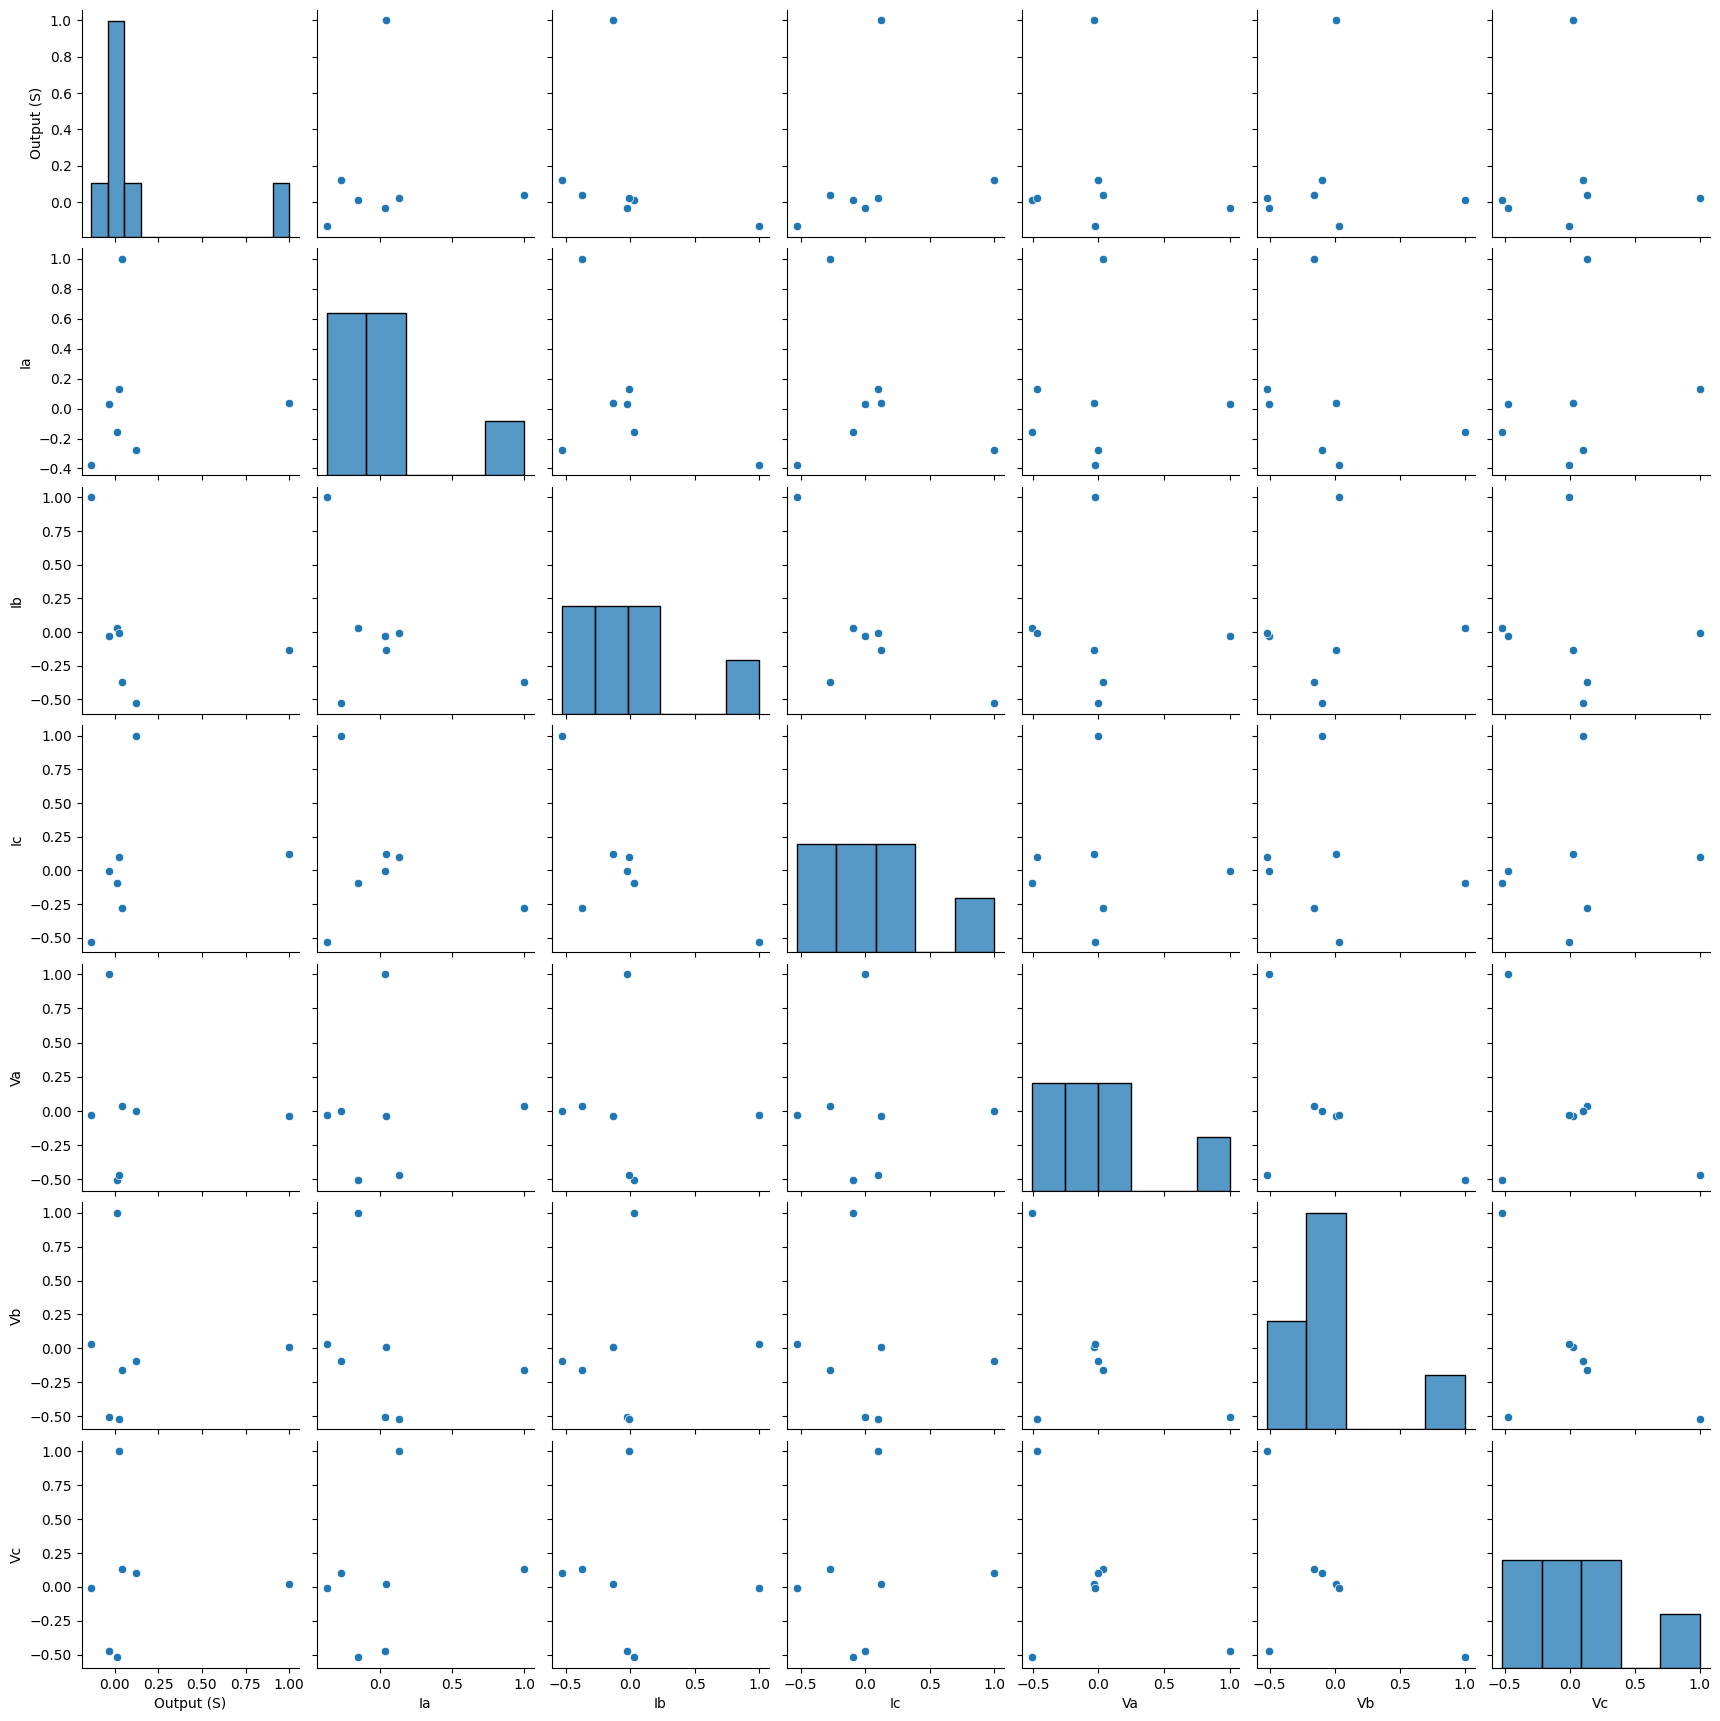

In [9]:
sns.pairplot(df.corr())
plt.show()

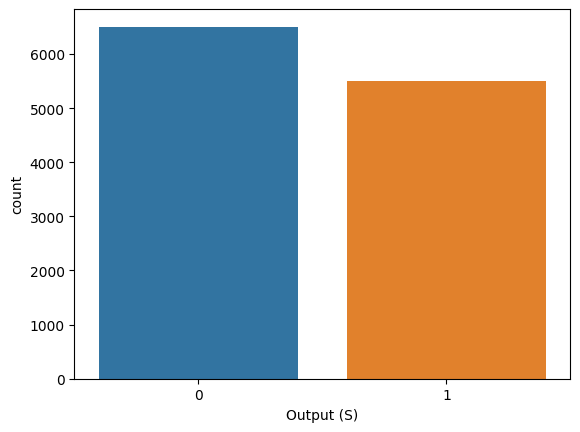

In [10]:
sns.countplot(data = df, x = 'Output (S)')
plt.show()

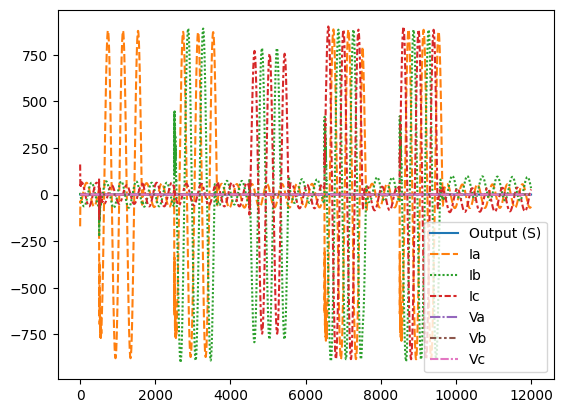

In [11]:
sns.lineplot(data = df)
plt.show()

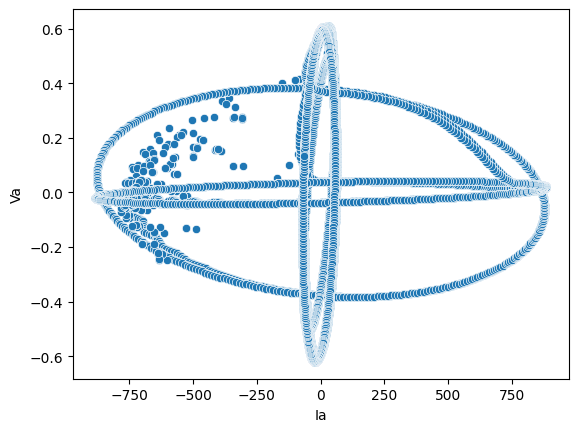

In [12]:
sns.scatterplot(data = df,x = 'Ia',y = 'Va')
plt.show()

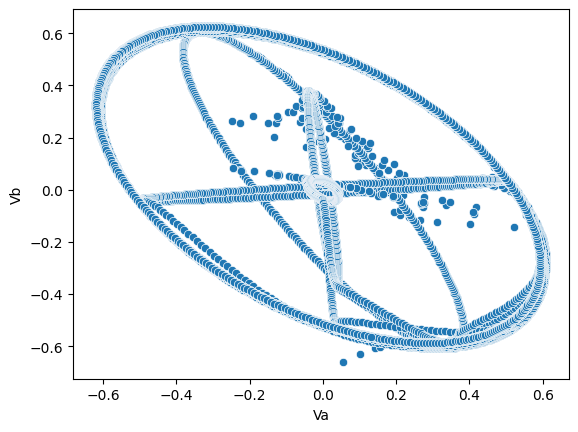

In [13]:
sns.scatterplot(data = df,x = 'Va',y = 'Vb')
plt.show()

C:\Users\ml2ai\anaconda3\envs\tf-gpu1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


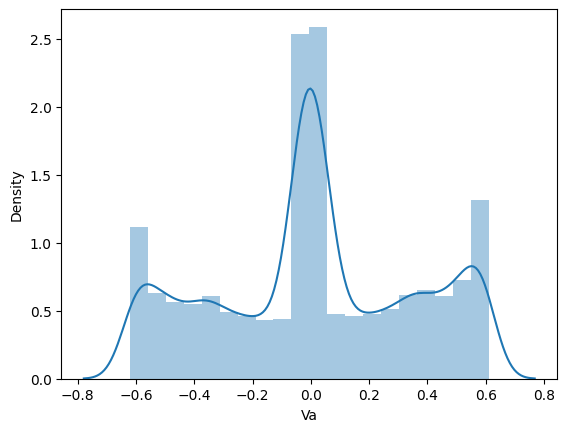

In [14]:
sns.distplot(df['Va'],bins = 20)
plt.show()

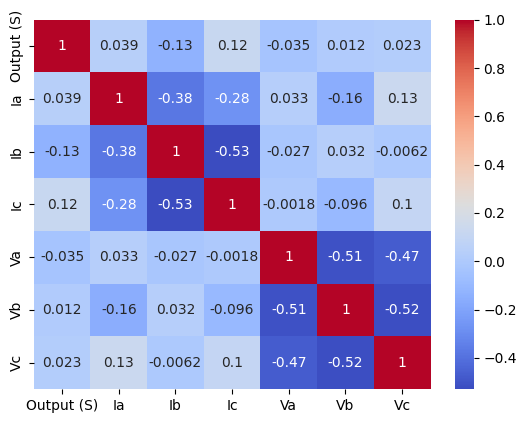

In [15]:
sns.heatmap(df.corr(),annot=True,cmap = 'coolwarm')
plt.show()

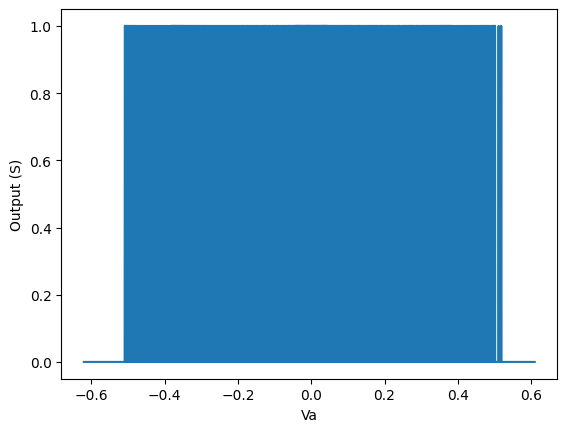

In [16]:
sns.lineplot(data = df,x = 'Va',y = 'Output (S)')
plt.show()

In [17]:
df.corr()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
Output (S),1.000000,0.039408,-0.134028,0.120044,-0.035377,0.012206,0.022570
Ia,0.039408,1.000000,-0.375477,-0.275694,0.032598,-0.158207,0.129686
Ib,-0.134028,-0.375477,1.000000,-0.530187,-0.027052,0.032248,-0.006205
Ic,0.120044,-0.275694,-0.530187,1.000000,-0.001813,-0.096194,0.100298
Va,-0.035377,0.032598,-0.027052,-0.001813,1.000000,-0.507928,-0.471163
Vb,0.012206,-0.158207,0.032248,-0.096194,-0.507928,1.000000,-0.520478
Vc,0.022570,0.129686,-0.006205,0.100298,-0.471163,-0.520478,1.000000


### Reading Inputs & Outputs

In [18]:
x = df[['Ia','Ia','Ic','Va','Vb','Vc']]

In [19]:
y = df['Output (S)']

### Splitting the data into training and testing sets

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

### Model Building

In [21]:
model = tf.keras.Sequential()

In [22]:
model.add(tf.keras.layers.Dense(128,activation = 'relu', input_shape = (6,)))
model.add(tf.keras.layers.Dense(256,activation = 'relu'))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(64,activation = 'relu'))
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 75,137
Trainable params: 75,137
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [24]:
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop',metrics = ['acc'])

### Training the model

In [25]:
history= model.fit(x_train,y_train,epochs = 50,batch_size = 128,validation_data=(x_test,y_test))

Epoch 1/50
75/75 [==============================] - 5s 15ms/step - loss: 1.6513 - acc: 0.5385 - val_loss: 0.4755 - val_acc: 0.6514
Epoch 2/50
75/75 [==============================] - 1s 11ms/step - loss: 0.5293 - acc: 0.6735 - val_loss: 0.4929 - val_acc: 0.8380
Epoch 3/50
75/75 [==============================] - 1s 14ms/step - loss: 0.3973 - acc: 0.8295 - val_loss: 0.3642 - val_acc: 0.8247
Epoch 4/50
75/75 [==============================] - 1s 17ms/step - loss: 0.2748 - acc: 0.9191 - val_loss: 0.2552 - val_acc: 0.9138
Epoch 5/50
75/75 [==============================] - 1s 14ms/step - loss: 0.2037 - acc: 0.9386 - val_loss: 0.2582 - val_acc: 0.9071
Epoch 6/50
75/75 [==============================] - 1s 11ms/step - loss: 0.1380 - acc: 0.9580 - val_loss: 0.0937 - val_acc: 0.9717
Epoch 7/50
75/75 [==============================] - 1s 7ms/step - loss: 0.1017 - acc: 0.9720 - val_loss: 0.0764 - val_acc: 0.9775
Epoch 8/50
75/75 [==============================] - 0s 7ms/step - loss: 0.0922 - acc

### Plotting the results

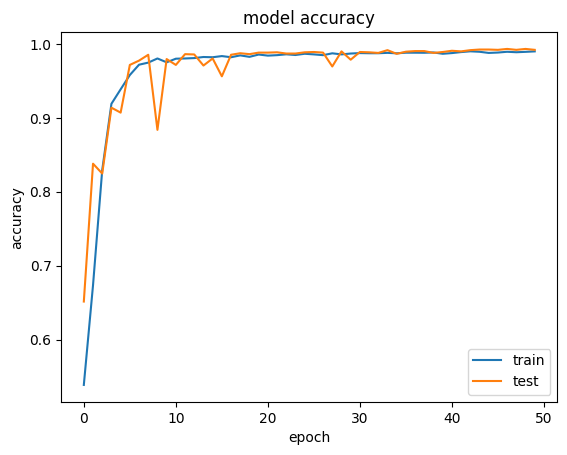

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

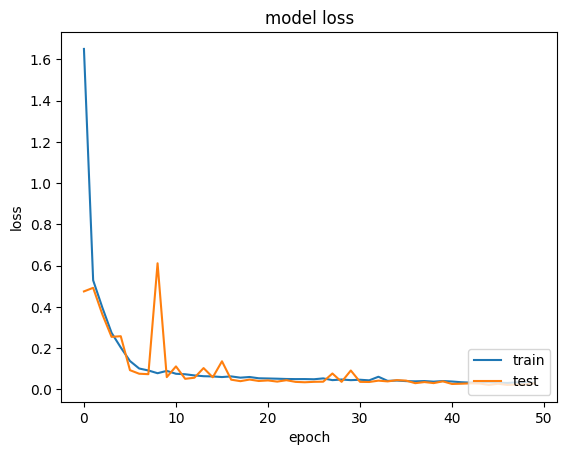

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [28]:
model.evaluate(x_test,y_test)

76/76 [==============================] - 1s 8ms/step - loss: 0.0303 - acc: 0.9921


[0.030326316133141518, 0.99208664894104]

### Model Predictions

In [29]:
x_test.reset_index(drop = True, inplace =True)

In [30]:
y_test.reset_index(drop = True, inplace = True)

In [36]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ia      2401 non-null   float64
 1   Ia      2401 non-null   float64
 2   Ic      2401 non-null   float64
 3   Va      2401 non-null   float64
 4   Vb      2401 non-null   float64
 5   Vc      2401 non-null   float64
dtypes: float64(6)
memory usage: 112.7 KB


In [32]:
y_test.head()

0    1
1    0
2    1
3    0
4    0
Name: Output (S), dtype: int64

In [33]:
y_t = model.predict(x_test)

### Checking the predictions

In [40]:
i = int(input("Enter any number between 1 to 2400 : "))

Give any number between 1 to 2400 : 5


In [47]:
print(f"The prediction of the {i}th value of the x_test is :",np.max(y_t[i][0]))
print(f"The actual value of the ith value of the x_test is :",y_test[i])

The prediction of the 5th value of the x_test is : 1.0
The actual value of the ith value of the x_test is : 1
